In [14]:
# Dcard intern hw
import numpy as np
import torch
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
# processor setting
print(torch.__version__)
print(torch.version.cuda)
if torch.cuda.is_available():
    cuda0 = torch.device(0)
    print(torch.cuda.get_device_name(cuda0))

1.12.1+cu113
11.3
NVIDIA GeForce RTX 2070


In [16]:
# load data
trainDataset = pd.read_csv("intern_homework_train_dataset.csv").reset_index(drop=True)
validDataset = pd.read_csv("intern_homework_public_test_dataset.csv").reset_index(drop=True)
trainDataset.to_html("TrainData.html")
validDataset.to_html("ValidData.html")
print("train dataset size:", trainDataset.shape)
print("valid dataset size:", validDataset.shape)

train dataset size: (50000, 18)
valid dataset size: (10000, 18)


In [17]:
# Data analyze
print("Checking null value")
print("Train dataset:")
print(trainDataset.isnull().any())
print("Valid dataset:")
print(validDataset.isnull().any())
print("Checking data type")
print(trainDataset.dtypes)

Checking null value
Train dataset:
title               False
created_at          False
like_count_1h       False
like_count_2h       False
like_count_3h       False
like_count_4h       False
like_count_5h       False
like_count_6h       False
comment_count_1h    False
comment_count_2h    False
comment_count_3h    False
comment_count_4h    False
comment_count_5h    False
comment_count_6h    False
forum_id            False
author_id           False
forum_stats         False
like_count_24h      False
dtype: bool
Valid dataset:
title               False
created_at          False
like_count_1h       False
like_count_2h       False
like_count_3h       False
like_count_4h       False
like_count_5h       False
like_count_6h       False
comment_count_1h    False
comment_count_2h    False
comment_count_3h    False
comment_count_4h    False
comment_count_5h    False
comment_count_6h    False
forum_id            False
author_id           False
forum_stats         False
like_count_24h      False
dt

In [18]:
# Word embedding with train dataset
from transformers import BertTokenizer, BertModel
import gc

tokenizer = BertTokenizer.from_pretrained('bert-base-chinese')
model = BertModel.from_pretrained('bert-base-chinese').cuda(device=cuda0)

title_list = list(trainDataset["title"])
embeddings_list = []
batch_size = 64

for i in range(0, len(title_list), batch_size):
    titles = title_list[i:i+batch_size]

    # tokenize titles
    inputs = tokenizer(titles, padding=True, truncation=True, max_length=50, return_tensors='pt').to(cuda0)

    # get embeddings
    with torch.no_grad():
        outputs = model(**inputs)

    # get embeddings from last hidden layer
    last_hidden_states = outputs.last_hidden_state
    embeddings = torch.mean(last_hidden_states, dim=1)  # average pooling

    embeddings_list.append(embeddings)

    del inputs, outputs, last_hidden_states, embeddings
    torch.cuda.empty_cache()

    print(f"Processed {i+batch_size}/{len(title_list)} titles.")

train_embeddings = torch.cat(embeddings_list, dim=0)

# check shape
print(train_embeddings.shape)

gc.collect()

Some weights of the model checkpoint at bert-base-chinese were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Processed 64/50000 titles.
Processed 128/50000 titles.
Processed 192/50000 titles.
Processed 256/50000 titles.
Processed 320/50000 titles.
Processed 384/50000 titles.
Processed 448/50000 titles.
Processed 512/50000 titles.
Processed 576/50000 titles.
Processed 640/50000 titles.
Processed 704/50000 titles.
Processed 768/50000 titles.
Processed 832/50000 titles.
Processed 896/50000 titles.
Processed 960/50000 titles.
Processed 1024/50000 titles.
Processed 1088/50000 titles.
Processed 1152/50000 titles.
Processed 1216/50000 titles.
Processed 1280/50000 titles.
Processed 1344/50000 titles.
Processed 1408/50000 titles.
Processed 1472/50000 titles.
Processed 1536/50000 titles.
Processed 1600/50000 titles.
Processed 1664/50000 titles.
Processed 1728/50000 titles.
Processed 1792/50000 titles.
Processed 1856/50000 titles.
Processed 1920/50000 titles.
Processed 1984/50000 titles.
Processed 2048/50000 titles.
Processed 2112/50000 titles.
Processed 2176/50000 titles.
Processed 2240/50000 titles.
P

654

In [19]:
# word embedding with valid dataset

title_list = list(validDataset["title"])
batch_size = 64
embeddings_list = []

for i in range(0, len(title_list), batch_size):
    titles = title_list[i:i+batch_size]
    
    inputs = tokenizer(titles, padding=True, truncation=True, max_length=50, return_tensors='pt').to(cuda0)
    
    with torch.no_grad():
        outputs = model(**inputs)
        
    last_hidden_states = outputs.last_hidden_state
    embeddings = torch.mean(last_hidden_states, dim=1)
    
    embeddings_list.append(embeddings)
    
    del titles, inputs, outputs, last_hidden_states
    torch.cuda.empty_cache()
    
    print(f"Processed {i+batch_size}/{len(title_list)} titles.")
    
valid_embeddings = torch.cat(embeddings_list, dim=0)

print(valid_embeddings.shape)

gc.collect()

Processed 64/10000 titles.
Processed 128/10000 titles.
Processed 192/10000 titles.
Processed 256/10000 titles.
Processed 320/10000 titles.
Processed 384/10000 titles.
Processed 448/10000 titles.
Processed 512/10000 titles.
Processed 576/10000 titles.
Processed 640/10000 titles.
Processed 704/10000 titles.
Processed 768/10000 titles.
Processed 832/10000 titles.
Processed 896/10000 titles.
Processed 960/10000 titles.
Processed 1024/10000 titles.
Processed 1088/10000 titles.
Processed 1152/10000 titles.
Processed 1216/10000 titles.
Processed 1280/10000 titles.
Processed 1344/10000 titles.
Processed 1408/10000 titles.
Processed 1472/10000 titles.
Processed 1536/10000 titles.
Processed 1600/10000 titles.
Processed 1664/10000 titles.
Processed 1728/10000 titles.
Processed 1792/10000 titles.
Processed 1856/10000 titles.
Processed 1920/10000 titles.
Processed 1984/10000 titles.
Processed 2048/10000 titles.
Processed 2112/10000 titles.
Processed 2176/10000 titles.
Processed 2240/10000 titles.
P

0

In [20]:
# data splitting and concatenating

y_train = torch.tensor(np.array(trainDataset.iloc[:, -1]), device=cuda0, dtype=torch.float32).reshape(50000, 1)
y_valid = torch.tensor(np.array(validDataset.iloc[:, -1]), device=cuda0, dtype=torch.float32).reshape(10000, 1)
print("y_train:", y_train.shape, y_train.type())
print("y_valid:", y_valid.shape, y_valid.type())

trainFeatures = torch.tensor(np.array(trainDataset.drop(["title", "created_at", "forum_id", "author_id", "forum_stats", "like_count_24h"], axis=1)), device=cuda0, dtype=torch.float32)
validFeatures = torch.tensor(np.array(validDataset.drop(["title", "created_at", "forum_id", "author_id", "forum_stats", "like_count_24h"], axis=1)), device=cuda0, dtype=torch.float32)

x_train = torch.cat((train_embeddings, trainFeatures), dim=1).to(device=cuda0)
x_valid = torch.cat((valid_embeddings, validFeatures), dim=1).to(device=cuda0)
print("x_train:", x_train.size(), x_train.type())
print("x_valid:", x_valid.size(), x_valid.type())

gc.collect()

y_train: torch.Size([50000, 1]) torch.cuda.FloatTensor
y_valid: torch.Size([10000, 1]) torch.cuda.FloatTensor
x_train: torch.Size([50000, 780]) torch.cuda.FloatTensor
x_valid: torch.Size([10000, 780]) torch.cuda.FloatTensor


0

In [48]:
# Word embedding network define
class bertNetwork(nn.Module):
    def __init__(self):
        super(bertNetwork, self).__init__()
        self.inputLayer = nn.Linear(768, 512).to(device=cuda0) # 768 word embedding
        self.hidden1 = nn.Linear(512, 256).to(device=cuda0)
        self.outputLayer = nn.Linear(256, 64).to(device=cuda0)
        self.relu = nn.ReLU().to(device=cuda0)
        self.dropout = nn.Dropout(p=0.5).to(device=cuda0)
        self.bn1 = nn.BatchNorm1d(512).to(device=cuda0)
        self.bn2 = nn.BatchNorm1d(256).to(device=cuda0)
        
    def forward(self, x):
        x = self.inputLayer(x)
        # x = self.bn1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.hidden1(x)
        # x = self.bn2(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.outputLayer(x)
        return x

In [49]:
# Other feature network define
class featureNetwork(nn.Module):
    def __init__(self):
        super(featureNetwork, self).__init__()
        self.inputLayer = nn.Linear(12, 32).to(device=cuda0) # 12 other features(like 1~6hr + comment 1~6hr)
        self.outputLayer = nn.Linear(32, 64).to(device=cuda0)
        self.relu = nn.ReLU().to(device=cuda0).to(device=cuda0)
        self.bn = nn.BatchNorm1d(32).to(device=cuda0)
        
    def forward(self, x):
        x = self.inputLayer(x)
        # x = self.bn(x)
        x = self.relu(x)
        x = self.outputLayer(x)
        return x

In [50]:
# Merge network define
class mergeNetwork(nn.Module):
    def __init__(self):
        super(mergeNetwork, self).__init__()
        self.bert_net = bertNetwork().to(device=cuda0)
        self.feature_net = featureNetwork().to(device=cuda0)
        self.inputLayer = nn.Linear(128, 64).to(device=cuda0) # 128 word embedding network + 128 feature network
        self.hidden1 = nn.Linear(64, 32).to(device=cuda0)
        self.hidden2 = nn.Linear(32, 16).to(device=cuda0)
        self.outputLayer = nn.Linear(16, 1).to(device=cuda0)
        self.relu = nn.ReLU().to(device=cuda0)
        self.dropout = nn.Dropout(p=0.5).to(device=cuda0)
        self.bn1 = nn.BatchNorm1d(64).to(device=cuda0)
        self.bn2 = nn.BatchNorm1d(32).to(device=cuda0)
        self.bn3 = nn.BatchNorm1d(16).to(device=cuda0)
        
    def forward(self, embedding, feature):
        embedding_out = self.bert_net(embedding)
        feature_out = self.feature_net(feature)
        x = torch.cat((embedding_out, feature_out), dim=1).to(device=cuda0)
        x = self.inputLayer(x)
        # x = self.bn1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.hidden1(x)
        # x = self.bn2(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.hidden2(x)
        # x = self.bn3(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.outputLayer(x)
        return x

In [51]:
from torchmetrics import MeanAbsolutePercentageError

minMape = float('inf')

model = mergeNetwork().to(cuda0)
# mseLoss = nn.MSELoss().to(cuda0)
l1loss = nn.SmoothL1Loss().to(cuda0)
mape = MeanAbsolutePercentageError().to(cuda0)

train_dataset = torch.utils.data.TensorDataset(x_train, y_train)
val_dataset = torch.utils.data.TensorDataset(x_valid, y_valid)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=True)

In [68]:
# hyperparameters
epochs = 100
learning_rate = 1e-5
weight_decay = 1e-3
batch_size = 256

optimizer = torch.optim.SGD(model.parameters(), momentum=0.5, lr=learning_rate, weight_decay=weight_decay)
# scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=300, gamma=0.1)
# model.load_state_dict(torch.load('model_save/model_epoch_0704_0.17.pt'))

In [69]:
train_losses = []
val_losses = []
train_mapes = []
val_mapes = []

for epoch in range(epochs):
    for (x_batch, y_batch), (x_val_batch, y_val_batch) in zip(train_loader, val_loader):
        optimizer.zero_grad()
        y_pred = model(x_batch[:, :768], x_batch[:, 768:])
        loss = l1loss(y_batch, y_pred)
        train_mape = mape(y_pred, y_batch)
        loss.backward()
        optimizer.step()
        y_val_pred = model(x_val_batch[:, :768], x_val_batch[:, 768:])
        val_mape = mape(y_val_pred, y_val_batch)
        
    # print loss and mape
    if((epoch+1) % 10 == 0):
        print ('Epoch [{}/{}], Loss: {:.4f}, train_mape: {:2.2f}%, val_mape: {:2.2f}%'
           .format(epoch+1, epochs, loss.item(), train_mape*100, val_mape*100))
    # save better model
    if(val_mape < minMape):
        torch.save(model.state_dict(), 'model_save/model_epoch_{:04d}_{:.2f}.pt'.format(epoch, val_mape))
        minMape = val_mape
    
    # # learning rate adjust
    # scheduler.step()
    # if((epoch+1) % 300 == 0):
    #     print("Learning rate:", scheduler.get_lr())
    
    train_losses.append(loss.item())
    val_losses.append(l1loss(y_val_pred, y_val_batch).item())
    train_mapes.append(train_mape)
    val_mapes.append(val_mape)

    del x_batch, y_batch, x_val_batch, y_val_batch
    del y_pred, loss, train_mape, y_val_pred, val_mape
    torch.cuda.empty_cache()

gc.collect()

Epoch [10/100], Loss: 14.9155, train_mape: 35.67%, val_mape: 24.54%
Epoch [20/100], Loss: 21.2210, train_mape: 37.98%, val_mape: 26.79%
Epoch [30/100], Loss: 19.0632, train_mape: 37.42%, val_mape: 58.66%
Epoch [40/100], Loss: 19.8042, train_mape: 39.00%, val_mape: 34.70%
Epoch [50/100], Loss: 18.1152, train_mape: 35.25%, val_mape: 45.76%
Epoch [60/100], Loss: 17.6873, train_mape: 38.43%, val_mape: 49.11%
Epoch [70/100], Loss: 15.7450, train_mape: 34.65%, val_mape: 37.06%
Epoch [80/100], Loss: 17.6287, train_mape: 36.20%, val_mape: 51.32%
Epoch [90/100], Loss: 18.8381, train_mape: 34.35%, val_mape: 38.62%
Epoch [100/100], Loss: 38.0358, train_mape: 39.76%, val_mape: 36.43%


0

Train: tensor(0.3738, device='cuda:0', grad_fn=<SqueezeBackward0>)
Valid: tensor(0.3714, device='cuda:0', grad_fn=<SqueezeBackward0>)


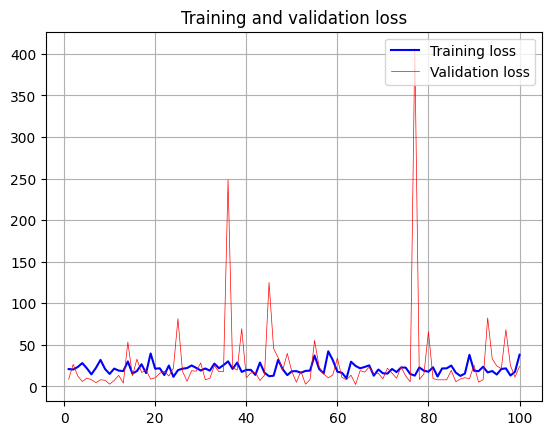

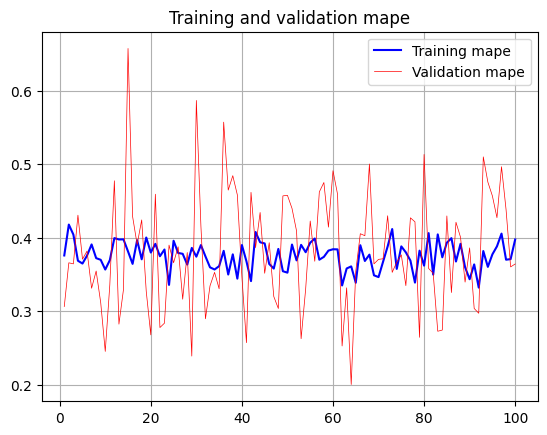

In [70]:
# model.load_state_dict(torch.load('model_save/model_epoch_0409_0.21.pt'))
print("Train:", mape(model(x_train[:, :768], x_train[:, 768:]), y_train))
print("Valid:", mape(model(x_valid[:, :768], x_valid[:, 768:]), y_valid))

epoch = range(1, epochs + 1)
plt.plot(epoch, train_losses,'b', label='Training loss')
plt.plot(epoch, val_losses,'r', label='Validation loss', linewidth=0.5)
plt.title('Training and validation loss')
plt.legend(loc='upper right')
plt.grid()
plt.show()

plt.plot(epoch, train_mapes,'b', label='Training mape')
plt.plot(epoch, val_mapes,'r', label='Validation mape', linewidth=0.5)
plt.title('Training and validation mape')
plt.legend(loc='upper right')
plt.grid()
plt.show()

In [59]:
testDataset = pd.read_csv("intern_homework_private_test_dataset.csv").reset_index(drop=True)
print(testDataset.shape)
print(testDataset.isnull().any())

(10000, 17)
title               False
created_at          False
like_count_1h       False
like_count_2h       False
like_count_3h       False
like_count_4h       False
like_count_5h       False
like_count_6h       False
comment_count_1h    False
comment_count_2h    False
comment_count_3h    False
comment_count_4h    False
comment_count_5h    False
comment_count_6h    False
forum_id            False
author_id           False
forum_stats         False
dtype: bool


In [60]:
# Word embedding with test dataset
from transformers import BertTokenizer, BertModel
import gc

tokenizer = BertTokenizer.from_pretrained('bert-base-chinese')
bertModel = BertModel.from_pretrained('bert-base-chinese').cuda(device=cuda0)

title_list = list(testDataset["title"])
batch_size = 32
embeddings_list = []

for i in range(0, len(title_list), batch_size):
    titles = title_list[i:i+batch_size]

    inputs = tokenizer(titles, padding=True, truncation=True, max_length=50, return_tensors='pt').to(cuda0)

    with torch.no_grad():
        outputs = bertModel(**inputs)
        
    last_hidden_states = outputs.last_hidden_state
    embeddings = torch.mean(last_hidden_states, dim=1)

    embeddings_list.append(embeddings)

    del inputs, outputs, last_hidden_states, embeddings
    torch.cuda.empty_cache()

    print(f"Processed {i+batch_size}/{len(title_list)} titles.")

test_embeddings = torch.cat(embeddings_list, dim=0)

print(test_embeddings.shape)

gc.collect()

Some weights of the model checkpoint at bert-base-chinese were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Processed 32/10000 titles.
Processed 64/10000 titles.
Processed 96/10000 titles.
Processed 128/10000 titles.
Processed 160/10000 titles.
Processed 192/10000 titles.
Processed 224/10000 titles.
Processed 256/10000 titles.
Processed 288/10000 titles.
Processed 320/10000 titles.
Processed 352/10000 titles.
Processed 384/10000 titles.
Processed 416/10000 titles.
Processed 448/10000 titles.
Processed 480/10000 titles.
Processed 512/10000 titles.
Processed 544/10000 titles.
Processed 576/10000 titles.
Processed 608/10000 titles.
Processed 640/10000 titles.
Processed 672/10000 titles.
Processed 704/10000 titles.
Processed 736/10000 titles.
Processed 768/10000 titles.
Processed 800/10000 titles.
Processed 832/10000 titles.
Processed 864/10000 titles.
Processed 896/10000 titles.
Processed 928/10000 titles.
Processed 960/10000 titles.
Processed 992/10000 titles.
Processed 1024/10000 titles.
Processed 1056/10000 titles.
Processed 1088/10000 titles.
Processed 1120/10000 titles.
Processed 1152/1000

4082

In [61]:
testFeatures = torch.tensor(np.array(testDataset.drop(["title", "created_at", "forum_id", "author_id", "forum_stats"], axis=1)), device=cuda0, dtype=torch.float32)
x_test = torch.cat((test_embeddings, testFeatures), dim=1).to(cuda0)
print("x_test: ", x_test.size(), x_test.type())

x_test:  torch.Size([10000, 780]) torch.cuda.FloatTensor


In [62]:
predict = torch.tensor(model(x_test[:, :768], x_test[:, 768:]), dtype=int).cpu().numpy()
resultPath = 'result.csv'
pd.DataFrame(predict).to_csv(resultPath, header = ["like_count_24h"], index = None)

C:\Users\user\AppData\Local\Temp\ipykernel_25368\1158811409.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  predict = torch.tensor(model(x_test[:, :768], x_test[:, 768:]), dtype=int).cpu().numpy()
